In [1]:
# Quick job with a few GB / no parallelization
# Should be parallelized to infer the set of possible thresholds
import os
from time import time
import multiprocessing as mp
from glob import glob
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_to_input = '/scratch/mt4493/twitter_labor/twitter-labor-data/data'
country_code = 'US'
model_names = ['iter_0-convbert-1122153','iter_1-convbert-3062566','iter_2-convbert-3139138','iter_3-convbert-3178321', 'iter_4-convbert-3308838']
classes = ['is_hired_1mo', 'is_unemployed', 'job_offer', 'job_search', 'lost_job_1mo']
path_to_fig = '/scratch/spf248/twitter/fig'
colors = sns.color_palette("husl",len(model_names))
n = 8 # log(N_obs)

In [ ]:
def score_dist_indiv(class_):
    print()
    print(class_)
    start_time = time()
    fig,ax = plt.subplots(figsize=(4,4))
    for i,model_name in enumerate(model_names):
        with mp.Pool() as pool:
            df = pd.concat(pool.map(pd.read_parquet, glob(os.path.join(path_to_input,'inference',country_code,model_name+'-new_samples','output',class_,'*.parquet'))))
        print(model_name, '# scored tweets:', df.shape[0])
        df = df.sort_values(by='score',ascending=False).reset_index(drop=True).reset_index()
        idx = df['score'].sub(0.95).abs().idxmin()
        df = df.groupby(pd.cut(df['index'],np.logspace(0,n,100))).agg({'index':'mean','score':'mean'}).set_index('index')['score']
        df.plot(ax=ax,linewidth=.5,marker='.',markersize=1,logx=True,label='iteration '+re.findall('iter_(\d)',model_name)[0],color=colors[i])
        ax.set_ylabel('Score',fontweight='bold')
        ax.set_xlabel('Rank',fontweight='bold')
        ax.tick_params(which='both',direction='in',pad=3)
        ax.locator_params(axis='y',nbins=5)
        ax.locator_params(axis='x',numticks=8)
        ax.set_title(class_,fontweight='bold')
        ax.legend(loc='best')
        ax.set_xticks(np.logspace(0,n,n+1))
        ax.set_xlim([1,10**n])
        ax.set_ylim([-0.01,1.01])
        plt.savefig(os.path.join(path_to_fig,'scores',class_+'.jpeg'),dpi=300,bbox_inches='tight')
        print('Time taken:', round(time() - start_time,1), 'seconds') # 49 (48 cores)
for class_ in classes:
    score_dist_indiv(class_)


is_hired_1mo
iter_0-convbert-1122153 # scored tweets: 99860695
iter_1-convbert-3062566 # scored tweets: 99994033
iter_2-convbert-3139138 # scored tweets: 99994033
iter_3-convbert-3178321 # scored tweets: 99994033
Time taken: 414.4 seconds

is_unemployed
iter_0-convbert-1122153 # scored tweets: 99994033
iter_1-convbert-3062566 # scored tweets: 99994033
iter_2-convbert-3139138 # scored tweets: 99994033
iter_3-convbert-3178321 # scored tweets: 99994033
Time taken: 429.2 seconds

job_offer
iter_0-convbert-1122153 # scored tweets: 99860695
iter_1-convbert-3062566 # scored tweets: 99994033
iter_2-convbert-3139138 # scored tweets: 99994033
iter_3-convbert-3178321 # scored tweets: 99994033
Time taken: 421.0 seconds

job_search
iter_0-convbert-1122153 # scored tweets: 99860695
iter_1-convbert-3062566 # scored tweets: 99994033
iter_2-convbert-3139138 # scored tweets: 99994033
iter_3-convbert-3178321 # scored tweets: 99994033
Time taken: 427.5 seconds

lost_job_1mo
iter_0-convbert-1122153 # scor

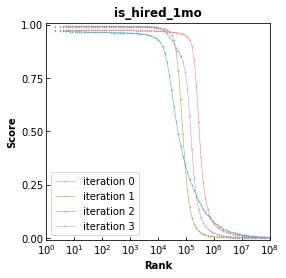

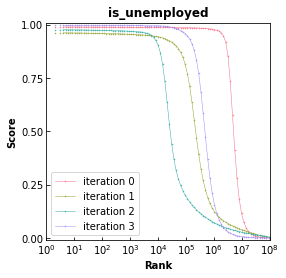

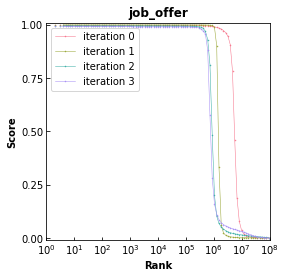

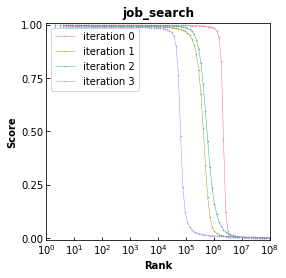

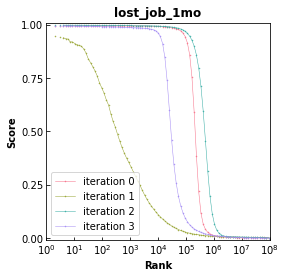

In [3]:
def score_dist(class_):
    print()
    print(class_)
    start_time = time()
    fig,ax = plt.subplots(figsize=(4,4))
    for i,model_name in enumerate(model_names):
        with mp.Pool() as pool:
            df = pd.concat(pool.map(pd.read_parquet, glob(os.path.join(path_to_input,'inference',country_code,model_name+'-new_samples','output',class_,'*.parquet'))))
        print(model_name, '# scored tweets:', df.shape[0])
        df = df.sort_values(by='score',ascending=False).reset_index(drop=True).reset_index()
        df = df.groupby(pd.cut(df['index'],np.logspace(0,n,100))).agg({'index':'mean','score':'mean'}).set_index('index')['score']
        df.plot(ax=ax,linewidth=.5,marker='.',markersize=1,logx=True,label='iteration '+re.findall('iter_(\d)',model_name)[0],color=colors[i])
    ax.set_ylabel('Score',fontweight='bold')
    ax.set_xlabel('Rank',fontweight='bold')
    ax.tick_params(which='both',direction='in',pad=3)
    ax.locator_params(axis='y',nbins=5)
    ax.locator_params(axis='x',numticks=8)
    ax.set_title(class_,fontweight='bold')
    ax.legend(loc='best')
    ax.set_xticks(np.logspace(0,n,n+1))
    ax.set_xlim([1,10**n])
    ax.set_ylim([-0.01,1.01])
    plt.savefig(os.path.join(path_to_fig,'scores',class_+'.jpeg'),dpi=300,bbox_inches='tight')
    print('Time taken:', round(time() - start_time,1), 'seconds') # 49 (48 cores)
for class_ in classes:
    score_dist(class_)